   ## EDA Mini Project

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fifa=pd.read_csv('fifa.csv')

In [4]:
fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


### dropping unecessary columns

In [5]:
fifa.drop(['Photo','Flag','Club Logo','Body Type', 'Skill Moves',
       'Body Type','Jersey Number','Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace=True)

In [6]:
fifa.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Work Rate                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
dtype: object

In [7]:
fifa['Value']=fifa['Value'].str.strip("€")

In [8]:
def convert(x):
    for i in x:
        if 'M' in x:
            x1=float(x.strip("M"))*(10**6)
        else:
            x1=float(x.strip("K"))*(10**3)
    return x1       

In [9]:
fifa['Value']=fifa['Value'].apply(convert)

In [10]:
fifa['Wage']=fifa['Wage'].str.strip("€")

In [11]:
fifa['Wage']=fifa['Wage'].apply(convert)

In [12]:
fifa['Joined']=fifa['Joined'].str.strip(' ')

In [13]:
fifa['Joined']=fifa['Joined'].str[-4:]

In [14]:
fifa['Joined']=fifa['Joined'].astype('Float32').astype('Int32')

In [15]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])

In [16]:
fifa['Height']=fifa['Height'].str.replace("'",'.').astype('Float32')

In [17]:
fifa['Weight'] = fifa['Weight'].str.strip("lbs").astype('Float32')

In [18]:
convert_RC= lambda x: (float(x.strip("M"))*(10**6) if ('M' in x) else float(x.strip("K"))*(10**3)) if (type(x)!=float) else x


In [19]:
fifa['Release Clause']=fifa['Release Clause'].str.strip("€")

In [20]:
fifa['Release Clause']=fifa['Release Clause'].apply(convert_RC)

In [21]:
missing_percentage=(fifa.isnull().sum()/len(fifa))*100

In [22]:
missing_percentage[missing_percentage>0]

Club                         1.323667
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Work Rate                    0.263635
Position                     0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Release Clause               8.590103
dtype: float64

Loaned From has 93% of missing values so  we can drop the column.

Contract Valid Until,Club has only 1% so we can drop the rows

Joined and Release Clause has 8% we can fill the values with mode and mean imputation.

In [23]:
fifa.drop(['Loaned From'],axis=1,inplace=True)

In [24]:
fifa.dropna(inplace=True,subset=['Preferred Foot','Club','Weak Foot','Work Rate','Position','Contract Valid Until','Height','Weight','International Reputation'])

In [25]:
after=(fifa.isnull().sum()/len(fifa))*100

In [26]:
after[after>0]

Joined            7.054359
Release Clause    7.115750
dtype: float64

In [27]:
fifa['Joined'].mode()[0]

2018

In [28]:
fifa['Joined'].fillna(fifa['Joined'].mode()[0],inplace=True)

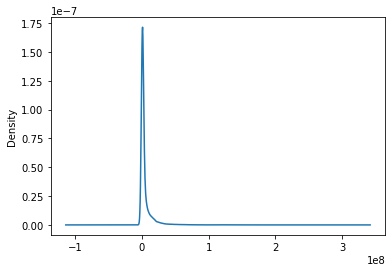

In [29]:
fifa['Release Clause'].plot(kind='kde')

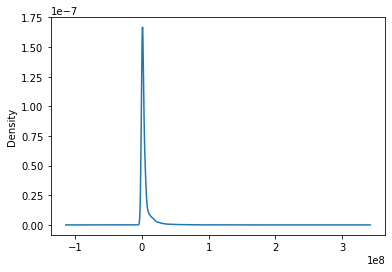

In [30]:
fifa['Release Clause'].fillna(fifa['Release Clause'].mean()).plot(kind='kde')

In [31]:
fifa['Release Clause'].fillna(fifa['Release Clause'].mean(),inplace=True)

In [32]:
fifa.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Work Rate                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

### 1. Plot the distribution of Overall rating for all players. 

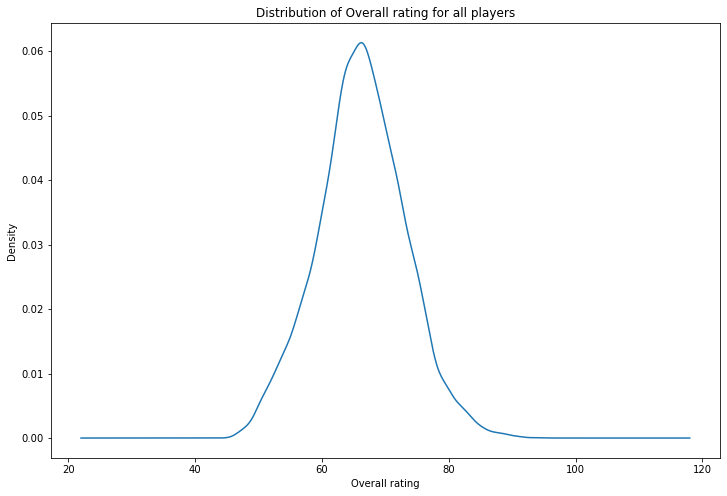

In [127]:
plt.figure(figsize=(12,8))
fifa['Overall'].plot(kind='kde')
plt.title('Distribution of Overall rating for all players')
plt.xlabel('Overall rating')
plt.show()

### 2.Generate pair plots for the following variables:
### overall, Value, Wage, International Reputation, Height, Weight, Release Clause


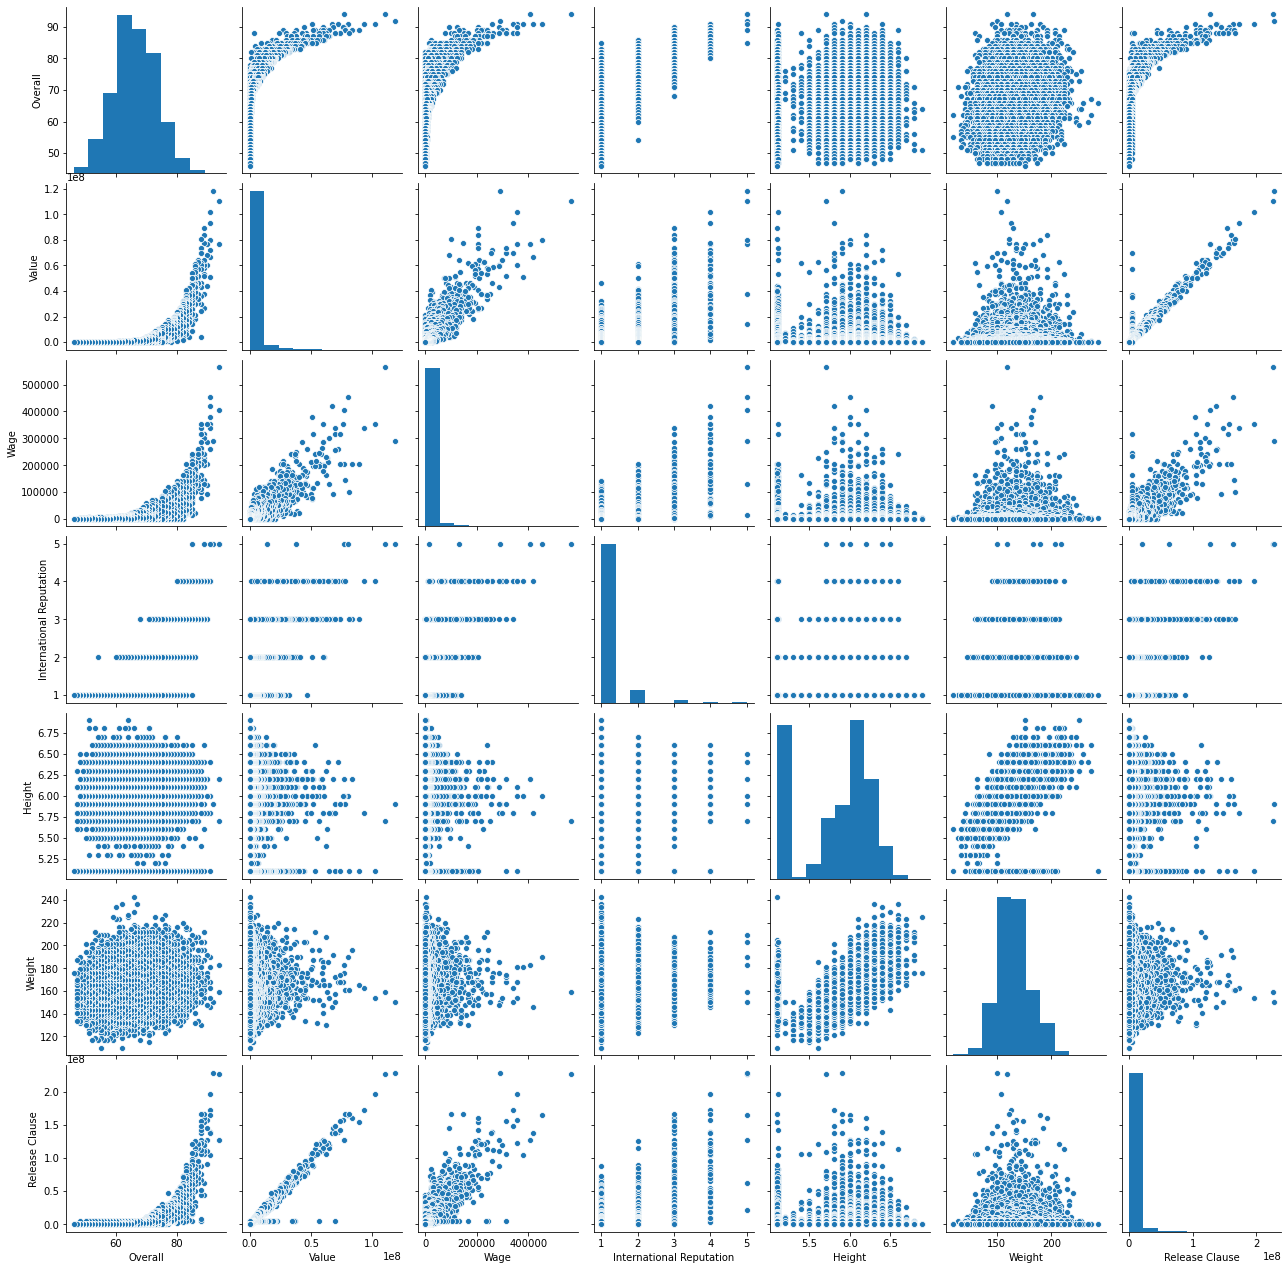

In [34]:
sns.pairplot(fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
### a)	What would the average wage for this set of players be?
### b)	What is the average age?
### c)	Is there a correlation between the Overall rating and Value for these players?


In [35]:
Top_20=fifa[pd.DatetimeIndex(fifa['Contract Valid Until']).year==2020].sort_values(by='Overall',ascending=False).head(20)

In [36]:
Top_20.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,Medium/ Medium,GK,2011,2020-01-01,6.4,168.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,High/ High,RCM,2012,2020-01-01,5.8,146.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,High/ Medium,RCB,2005,2020-01-01,6.0,181.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,High/ Medium,LF,2012,2020-01-01,5.8,163.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,High/ Medium,LCM,2010,2020-01-01,5.8,148.0,111000000.0


In [37]:
print('The average wage of top 20 players is',Top_20['Wage'].mean())

The average wage of top 20 players is 205450.0


In [38]:
print('The average age of top 20 players is',Top_20['Age'].mean())

The average age of top 20 players is 30.65


In [39]:
Top_20['Overall'].corr(Top_20['Value'])

0.7867166042074152

There is a positive correlation of 0.78  overall rating and value of these set of players.

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
### a)	Are there any players appearing in more than one Table. Please point out such players.
### b)	What is the average wage one can expect to pay for the top 5 in every position?


In [43]:
positions=list(fifa['Position'].unique())

In [41]:
fifa['Position'].nunique()
    

27

In [64]:
fifa[fifa['Position']=='LW'].sort_values(by='Overall',ascending=True).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18038,243790,Zhen'ao Wang,18,China PR,50,62,Vejle Boldklub,50000.0,1000.0,Right,1.0,3.0,Medium/ Low,LW,2018,2020-01-01,5.9,143.0,73000.0
17938,245861,L. Cavallini,18,Italy,51,69,Foggia,80000.0,1000.0,Left,1.0,3.0,Medium/ Medium,LW,2018,2021-01-01,5.1,157.0,178000.0
17899,244494,F. Delaveris,17,Norway,51,66,Odds BK,70000.0,1000.0,Right,1.0,3.0,Medium/ Medium,LW,2018,2020-01-01,5.9,154.0,131000.0
17740,240650,R. Najjarine,18,Australia,52,71,Melbourne City FC,100000.0,1000.0,Left,1.0,3.0,High/ Medium,LW,2017,2020-01-01,5.9,157.0,188000.0
17727,242941,M. Bustgaard Larsen,18,Norway,53,70,Odds BK,120000.0,1000.0,Left,1.0,3.0,Medium/ Medium,LW,2017,2020-01-01,5.9,143.0,225000.0


In [76]:
top_5={}
for i in positions:
    x=fifa[fifa['Position']==i].sort_values(by='Overall',ascending=False).head(5)
    top_5[i]=x
top_5    

{'RF':           ID         Name  Age Nationality  Overall  Potential  \
 0     158023     L. Messi   31   Argentina       94         94   
 50    175943   D. Mertens   31     Belgium       87         87   
 528   172114    D. Valeri   32   Argentina       80         80   
 890   150516  L. Podolski   33     Germany       78         78   
 1774  201313     C. Ciano   28       Italy       75         75   
 
                   Club        Value      Wage Preferred Foot  \
 0         FC Barcelona  110500000.0  565000.0           Left   
 50              Napoli   45000000.0  135000.0          Right   
 528   Portland Timbers   11500000.0   12000.0          Right   
 890        Vissel Kobe    6500000.0   11000.0           Left   
 1774         Frosinone    6500000.0   17000.0           Left   
 
       International Reputation  Weak Foot       Work Rate Position  Joined  \
 0                          5.0        4.0  Medium/ Medium       RF    2004   
 50                         3.0        4

In [77]:
top_5['RF']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,Medium/ Medium,RF,2004,2021-01-01,5.7,159.0,226500000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,3.0,4.0,High/ Low,RF,2013,2020-01-01,5.7,134.0,76500000.0
528,172114,D. Valeri,32,Argentina,80,80,Portland Timbers,11500000.0,12000.0,Right,2.0,3.0,High/ Medium,RF,2013,2018-01-01,5.1,165.0,17300000.0
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,6500000.0,11000.0,Left,3.0,3.0,Medium/ Low,RF,2017,2019-01-01,6.0,183.0,8100000.0
1774,201313,C. Ciano,28,Italy,75,75,Frosinone,6500000.0,17000.0,Left,1.0,4.0,High/ Medium,RF,2017,2021-01-01,5.9,161.0,11700000.0


In [112]:
top_5.keys()

dict_keys(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'])

In [105]:
27*5

135

In [115]:
set_1=set()
for i in top_5.keys():
    for j in top_5[i]['ID']:
        set_1.add(j)
    

In [116]:
len(set_1)

135

There are 135 unique names in the set hence there is not even one name which is repeated.

In [119]:
avg_wage={}
for i in top_5.keys():
    avg_wage[i]=empt_dict[i]['Wage'].mean()
        
    

In [142]:
avg_wage

{'RF': 148000.0,
 'ST': 294000.0,
 'LW': 261000.0,
 'GK': 192800.0,
 'RCM': 240800.0,
 'LF': 121200.0,
 'RS': 132200.0,
 'RCB': 231000.0,
 'LCM': 184400.0,
 'CB': 139600.0,
 'LDM': 126600.0,
 'CAM': 174000.0,
 'CDM': 217000.0,
 'LS': 130200.0,
 'LCB': 162000.0,
 'RM': 131400.0,
 'LAM': 81600.0,
 'LM': 164600.0,
 'LB': 177200.0,
 'RDM': 105000.0,
 'RW': 202000.0,
 'CM': 130600.0,
 'RB': 155400.0,
 'RAM': 45400.0,
 'CF': 47400.0,
 'RWB': 44200.0,
 'LWB': 34200.0}

In [141]:
min(avg_wage.values()),max(avg_wage.values())

(34200.0, 294000.0)

the average wage for top 5 in every unique positions are :
 'RF': 148000.0,
 'ST': 294000.0,
 'LW': 261000.0,
 'GK': 192800.0,
 'RCM': 240800.0,
 'LF': 121200.0,
 'RS': 132200.0,
 'RCB': 231000.0,
 'LCM': 184400.0,
 'CB': 139600.0,
 'LDM': 126600.0,
 'CAM': 174000.0,
 'CDM': 217000.0,
 'LS': 130200.0,
 'LCB': 162000.0,
 'RM': 131400.0,
 'LAM': 81600.0,
 'LM': 164600.0,
 'LB': 177200.0,
 'RDM': 105000.0,
 'RW': 202000.0,
 'CM': 130600.0,
 'RB': 155400.0,
 'RAM': 45400.0,
 'CF': 47400.0,
 'RWB': 44200.0,
 'LWB': 34200.0
 
 
 the minimun wage paid is 34200 and the maximum average wage paid is 294000 for these players.